## Linear Regression For Cars Co2 Emission

### Objective
A hands-on exercise for following:
- Use **scikit-learn** to implement simple linear regression
- Create, train, and test a **linear regression** model on real data

### Use Case

 Using simple linear regression on fuel consumption dataset which contains model-specific fuel consumption ratings, we will be estimating Carbon Dioxide (CO2) emission for new light vehicles for retail car sales in Canada.  We will be using open source dataset [FuelConsumptionsCo2.csv](files/FuelConsumptionsCo2.csv) from https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64

### Import
Check and install the following packages:
- NumPy
- Matplotlib
- Pandas
- Scikit-learn

In [ ]:
from pandas.core.sample import sample
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib

Use the imported libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Load the Data
The dataset we will be using will be the file [FuelConsumptionsCo2.csv](files/FuelConsumptionsCo2.csv). We will simply read the file using pandas

In [5]:
df = pd.read_csv("./FuelConsumptionCo2.csv")

In [6]:
# Verify the file load by loading some sample records
df.sample(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
376,2014,FORD,F150 FFV,PICKUP TRUCK - STANDARD,3.7,6,A6,E,18.8,13.7,16.5,17,264
69,2014,BENTLEY,CONTINENTAL GT,SUBCOMPACT,6.0,12,AS8,Z,18.8,11.5,15.5,18,356
462,2014,GMC,SIERRA 4WD,PICKUP TRUCK - STANDARD,6.2,8,A6,Z,16.4,11.7,14.3,20,329
763,2014,MERCEDES-BENZ,ML 350 4MATIC FFV,SUV - STANDARD,3.5,6,AS7,E,17.8,13.8,16.0,18,256
479,2014,GMC,YUKON XL 4WD,SUV - STANDARD,5.3,8,A6,X,16.0,11.1,13.8,20,317
593,2014,JEEP,PATRIOT 4X4,SUV - SMALL,2.4,4,A6,X,11.4,8.7,10.2,28,235
408,2014,FORD,FOCUS SFE FFV,COMPACT,2.0,4,A6,E,11.6,8.3,10.1,28,162
398,2014,FORD,FLEX AWD,SUV - STANDARD,3.5,6,AS6,X,13.7,10.2,12.1,23,278
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
120,2014,BMW,M6,COMPACT,4.4,8,AM7,Z,17.3,11.5,14.7,19,338


### Understand the data
With reference to the website [https://open.canada.ca](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64),
FuelConsumption data has following fields:
 - MODEL YEAR e.g. 2014
 - MAKE e.g. VOLVO
 - MODEL e.g. S60 AWD
 - VEHICLE CLASS e.g. COMPACT
 - ENGINE SIZE e.g. 3.0
 - CYLINDERS e.g 6
 - TRANSMISSION e.g. AS6
 - FUEL TYPE e.g. Z
 - FUEL CONSUMPTION in CITY(L/100 km) e.g. 13.2
 - FUEL CONSUMPTION in HWY (L/100 km) e.g. 9.5
 - FUEL CONSUMPTION COMBINED (L/100 km) e.g. 11.5
 - FUEL CONSUMPTION COMBINED MPG (MPG) e.g. 25
 - CO2 EMISSIONS (g/km) e.g. 182                                                
We will be creating a simple linear regression model by simply using one of these features to predict the CO2 emission of unobserved cars based on that feature

### Explore the data
A statistical summary of data

In [8]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


From above, we can observe that the 75% of the cars have almost 3 times the fuel consumption than the most efficient cars. Its values are in the range 11 to 31 MPG. Highest value of 60 needs to be checked if legitimate. Model Year feature has no standard deviation and hence this can be discarded for further analysis.

### Feature Selection
Exploring and selecting features associated with CO2 emission.

In [10]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.sample(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
181,6.2,8,16.4,377
586,3.6,6,12.1,278
283,5.7,8,12.8,294
11,3.5,6,10.4,239
668,5.0,8,12.6,290
373,3.5,6,13.4,308
249,1.8,4,8.3,191
256,1.4,4,7.9,182
835,3.7,6,11.7,269
229,2.5,4,9.6,221


### Visualization


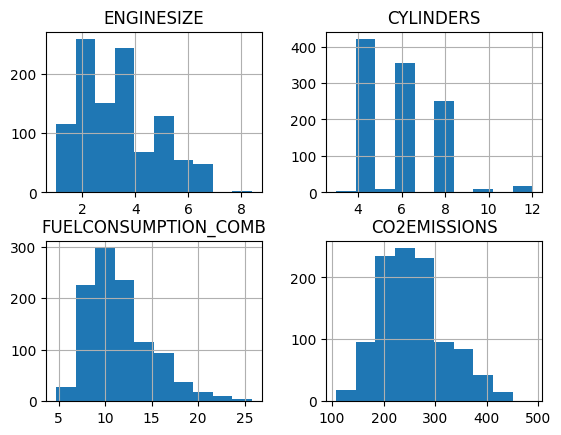

In [13]:
viz = cdf
viz.hist()
plt.show()

Following observations can be made from the graphs above:
- Most cars have 4,6 or 8 cylinders
- Most distribution for engine size is between 2 and 4 litres
- Fuel consumption and Co2 emission have very similar distribution pattern.

Lets try to scatter plot Fuel consumption against CO2 emission to understand the linear relationship.

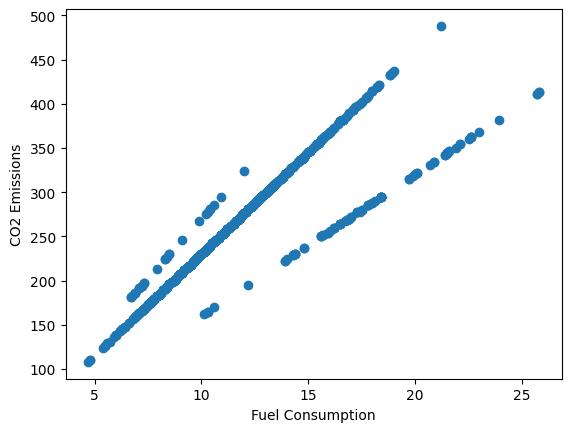

In [16]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS)
plt.xlabel("Fuel Consumption")
plt.ylabel("CO2 Emissions")
plt.show()

As seen above, there are 3 groups that have strong linear relationship between fuel consumption and emission. Their intercept are similar and differ in slopes.

Now let try to scatter plot engine size against CO2 emission to understand the linear relationship.

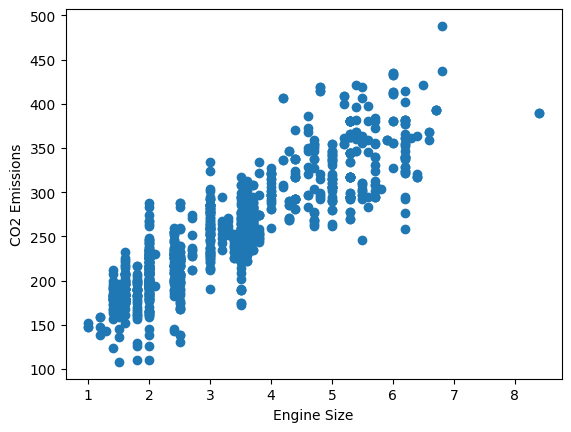

In [33]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS)
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.show()

Although the relationship is linear but their correlation is weaker compared to fuel consumption groups.

Now lets try to scatter plot cylinder against emissions to understand their relationship

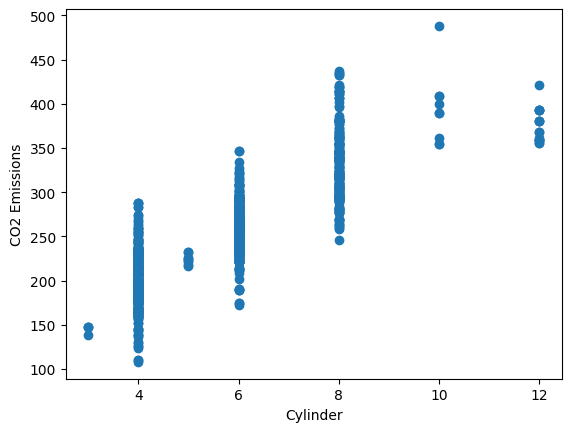

In [32]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS)
plt.xlabel("Cylinder")
plt.ylabel("CO2 Emissions")
plt.show()

Even cylinder doesnt have a strong relationship with co2 emission. So far, fuel consumption is the most valid feature with strong linear relation with CO2 emission. So lets focus on it to predict CO2 emission.

Lets extract the input feature and output target from the dataset

In [53]:
X = cdf.FUELCONSUMPTION_COMB.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

### Train and Test Data
Lets split the data into 80% as train and 20% as test sets.

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Check the type of output arrays

In [55]:
type(X_train), np.shape(X_train), np.shape(y_train)

(numpy.ndarray, (853,), (853,))

### Build Regression Model
Building a linear regression model from scikit-learn

In [56]:
from sklearn import linear_model

# Create a model object
regressor = linear_model.LinearRegression()

# Training the model on train set
# As sklear model expects 2D array, we will be converting it into 2D array using numpy reshape
regressor.fit(X_train.reshape(-1,1), y_train)

# Determine the coefficients
print('Coefficients:', regressor.coef_[0])
print('Intercept:', regressor.intercept_)

Coefficients: 16.180900781199195
Intercept: 69.10302617988444


### Visualize the Output
Visualizing the goodness-to-fit of the model to the training data by plotting the fitted line over the data.
Fitted line of the model will be y = intercept + X * coefficient

Text(0, 0.5, 'CO2 Emission')

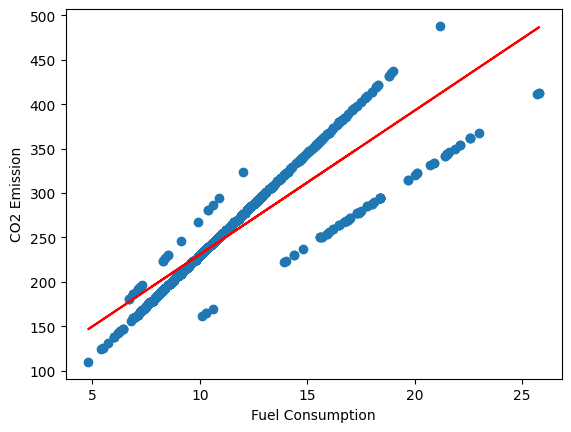

In [57]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.intercept_ + X_train*regressor.coef_[0], color='red')
plt.xlabel("Fuel Consumption")
plt.ylabel("CO2 Emission")

### Model Evaluation
We now need to compare the actual values and predicted values to calculate the accuracy of model. We will be using following four metrics to calculate the accuracy of our model:
- Mean Absolute Error
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R-squared

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prediction
y_test_ = regressor.predict(X_test.reshape(-1,1))

# Evaluation
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_test_))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_)))
print("R2-score: %.2f" % r2_score(y_test, y_test_))

Mean absolute error: 20.44
Mean squared error: 797.43
Root mean squared error: 28.24
R2-score: 0.81


### Test Data Plotting
Plot the scatter graph using test data instead of train data to visually evaluate.

Text(0, 0.5, 'Emission')

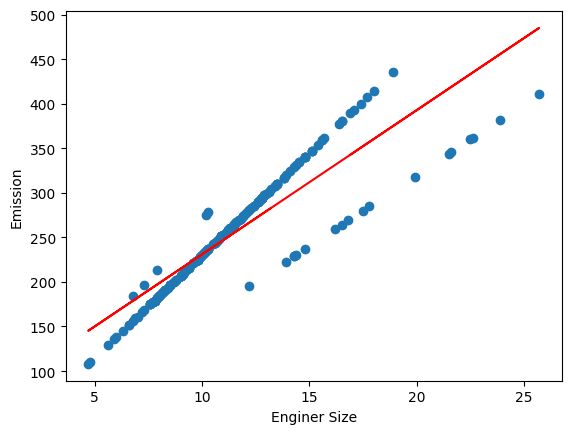

In [59]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.coef_ * X_test + regressor.intercept_, color='red')
plt.xlabel("Enginer Size")
plt.ylabel("Emission")

### Feature Comparision
Just to compare best feature , we will train the model using another feature EngineSize instead of Fuel Consumption.

In [60]:
X = cdf.ENGINESIZE.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train the linear regression model 

In [61]:
regr = linear_model.LinearRegression() 

regr.fit(X_train.reshape(-1, 1), y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Prediction and calculate the MSE

In [62]:
y_test_2_ = regr.predict(X_test.reshape(-1,1))
print("Mean Squared Error: %.2f"%mean_squared_error(y_test, y_test_2_))

Mean Squared Error: 985.94


As you can see, Mean Squared Error i.e. MSE for **Engine Size** is larger than MSE fo **Fuel consumption**. So for exploratory analysis, **Fuel Consumption** is best feature to be used.